In [ ]:
import numpy as np
import cv2
import scipy
from PIL import Image
import matplotlib.pyplot as plt

## Ejercicio 1.1

Podríamos llamar a al coeficiente de luminancia (si es menor que uno, baja la luminancia, y viceversa), y b al coeficiente de saturación (si es menor que uno baja la saturación, y viceversa). El workflow a implementar consiste en los siguientes pasos:

1. Normalizar los valores de RGB del pixel
2. RGB -> YIQ (utilizando la segunda matriz)
3. Y’ := aY ;
4. I’ := bI ; Q’ := bQ ;
5. Chequear que Y’ <= 1 (para que no se vaya de rango)
6. Chequear -0.5957 < I’ < 0.5957 y -0.5226 < Q’ < 0.5226
7. Y’I’Q’ -> R’G’B’ (el RGB normalizado del pixel procesado)
8. Convertir R’G’B’ a bytes y graficar el pixel

In [ ]:
#Abrimos nuestra imágen
imagen=cv2.imread(str(input('Nombre del archivo:')))
#Por defecto OpenCV lee las imágenes en BGR, por lo tanto hay que cambiarlas a RGB
imagen_RGB=cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

Nombre del archivo:Koala.jpg


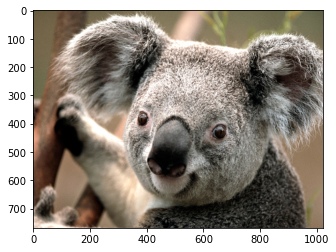

In [ ]:
plt.imshow(imagen_RGB)
plt.show()

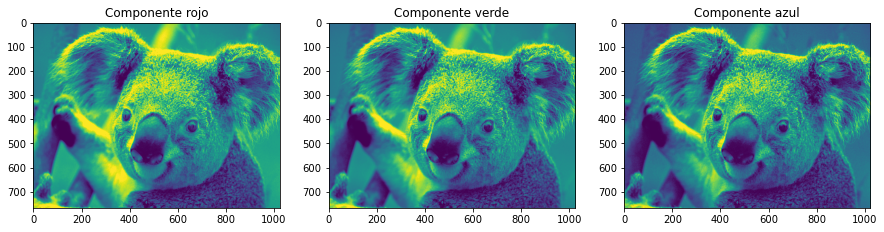

In [ ]:
#Visualizamos cada una de las componentes
plt.figure(figsize=([15,12]))

plt.subplot(1,3,1), plt.imshow(imagen_RGB[:,:,0]),
plt.title('Componente rojo')
plt.subplot(1,3,2), plt.imshow(imagen_RGB[:,:,1]),
plt.title('Componente verde')
plt.subplot(1,3,3), plt.imshow(imagen_RGB[:,:,2]),
plt.title('Componente azul')

plt.show()

In [ ]:
#Normalización
normalizada=np.zeros([imagen_RGB.shape[0],imagen_RGB.shape[1],imagen_RGB.shape[2]])
normalizada=cv2.normalize(src=imagen_RGB,dst=normalizada,alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

In [ ]:
#Corroboramos el valor máximo y mínimo de nuestra imágen normalizada
(normalizada.min(), normalizada.max())

(0.0, 1.0)

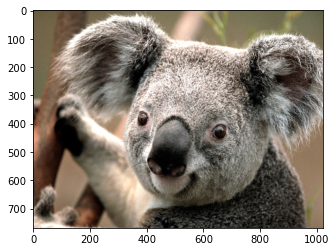

In [ ]:
#Graficamos nuestra imágen normalizada
plt.imshow(normalizada)
plt.show()

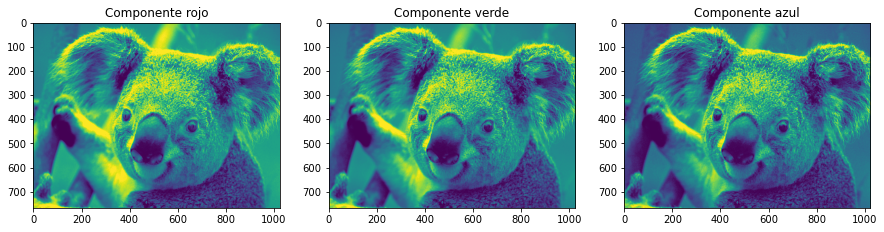

In [ ]:
#Graficamos las componentes de la imágen normalizada
plt.figure(figsize=([15,12]))

plt.subplot(1,3,1), plt.imshow(normalizada[:,:,0]),
plt.title('Componente rojo')
plt.subplot(1,3,2), plt.imshow(normalizada[:,:,1]),
plt.title('Componente verde')
plt.subplot(1,3,3), plt.imshow(normalizada[:,:,2]),
plt.title('Componente azul')

plt.show()

In [ ]:
#Matriz de rgb a yiq
matriz_yiq=np.array([[0.299, 0.587, 0.114],[0.595716, -0.274453, -0.321263], [0.211456, -0.522591, 0.311135]])
matriz_yiq

array([[ 0.299   ,  0.587   ,  0.114   ],
       [ 0.595716, -0.274453, -0.321263],
       [ 0.211456, -0.522591,  0.311135]])

In [ ]:
#Matriz de YIQ a RGB
matriz_rgb=np.array([[1, 0.9563, 0.6210], [1, -0.2721, -0.6474], [1, -1.1070, 1.7046]])
matriz_rgb

array([[ 1.    ,  0.9563,  0.621 ],
       [ 1.    , -0.2721, -0.6474],
       [ 1.    , -1.107 ,  1.7046]])

In [ ]:
def cambios(alpha,beta):
    #Cambio de espacio de color
    yiq=np.zeros([normalizada.shape[0],normalizada.shape[1],normalizada.shape[2]])

    for i in range(normalizada.shape[0]):
        for j in range(normalizada.shape[1]):
            yiq[i,j,:]=np.dot(matriz_yiq,normalizada[i,j,:])
        
    #Modificaciones
    c=np.zeros([yiq.shape[0],yiq.shape[1],yiq.shape[2]])
    cc=np.zeros([yiq.shape[0],yiq.shape[1],yiq.shape[2]])


    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            
            c[i,j,:][0]=yiq[i,j,:][0]*alpha
            
            # Chequeamos Y'
            if c[i,j,:][0]>1:
                c[i,j,:][0]=1
            else:
                c[i,j,:][0]=yiq[i,j,:][0]*alpha
            
            
            c[i,j,:][1]=yiq[i,j,:][1]*beta
            
            # Chequeamos I'
            if c[i,j,:][1]>= abs(0.5957):
                c[i,j,:][1]= abs(0.5957)
            else:
                c[i,j,:][1]=yiq[i,j,:][1]*beta
            
            c[i,j,:][2]=yiq[i,j,:][2]*beta
            
            # Chequeamos Q'
            if c[i,j,:][2]>= abs(0.5226):
                c[i,j,:][2]= abs(0.5226)
            else:
                c[i,j,:][2]=yiq[i,j,:][2]*beta
            
            

    #Cambio a rgb
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            c[i,j,:]=np.dot(matriz_rgb,c[i,j,:])
        
    #Paso a bits
    cc=cv2.normalize(src=c,dst=cc,alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return cc

In [ ]:
#Ingresamos los valores de alpha y beta 
alpha=float(input('alpha:'))
beta=float(input('beta:'))
cc=cambios(alpha,beta)

alpha:0.4
beta:1


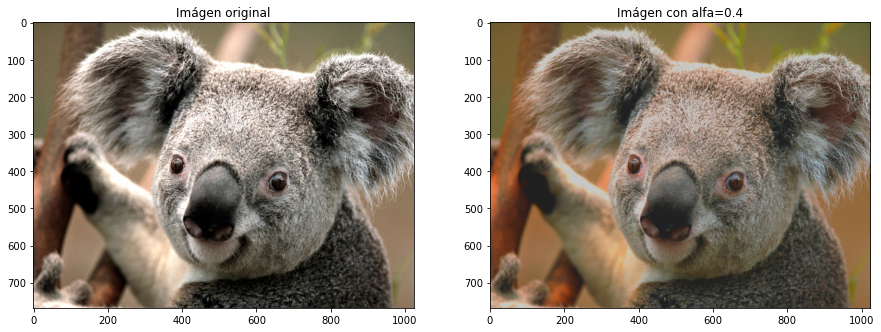

In [ ]:
plt.figure(figsize=([15,12]))

plt.subplot(1,2,1), plt.imshow(imagen_RGB),
plt.title('Imágen original')
plt.subplot(1,2,2), plt.imshow(cc.astype('uint8')),
plt.title('Imágen con alfa=0.4')

plt.show()

In [ ]:
alpha=float(input('alpha:'))
beta=float(input('beta:'))
ccc=cambios(alpha,beta)

alpha:1.6
beta:1


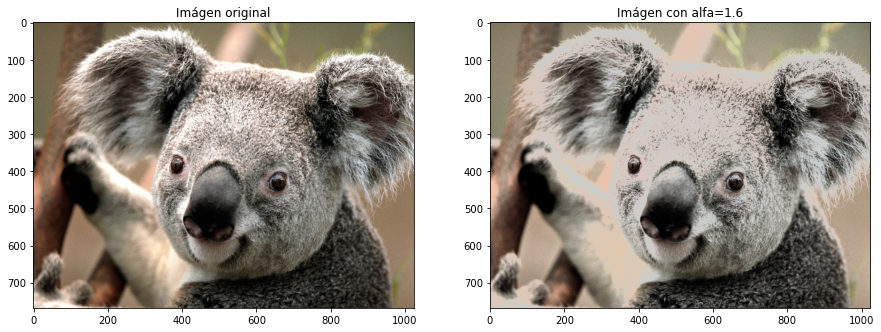

In [ ]:
plt.figure(figsize=([15,12]))

plt.subplot(1,2,1), plt.imshow(imagen_RGB),
plt.title('Imágen original')
plt.subplot(1,2,2), plt.imshow(ccc.astype('uint8')),
plt.title('Imágen con alfa=1.6')

plt.show()

Parece que para alfa >1 la imágen se aclarece, y para alfa<1 la imágen se oscurece

In [ ]:
alpha=float(input('alpha:'))
beta=float(input('beta:'))
b=cambios(alpha,beta)

alpha:1
beta:0.2


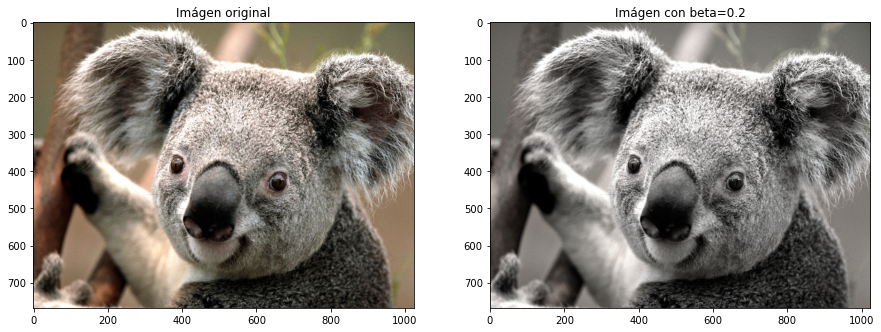

In [ ]:
plt.figure(figsize=([15,12]))

plt.subplot(1,2,1), plt.imshow(imagen_RGB),
plt.title('Imágen original')
plt.subplot(1,2,2), plt.imshow(b.astype('uint8')),
plt.title('Imágen con beta=0.2')

plt.show()

In [ ]:
alpha=float(input('alpha:'))
beta=float(input('beta:'))
bb=cambios(alpha,beta)

alpha:1
beta:1.5


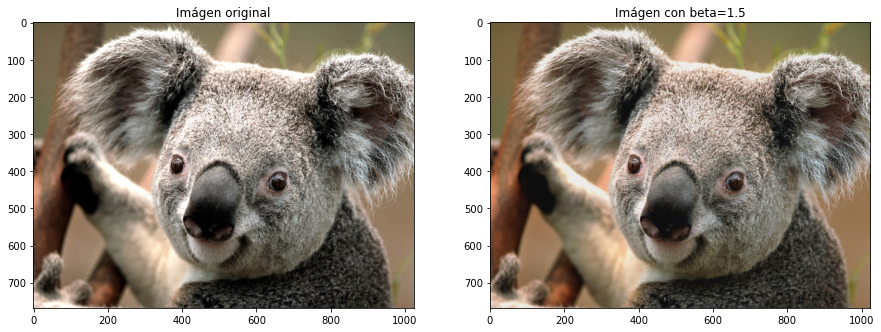

In [ ]:
plt.figure(figsize=([15,12]))

plt.subplot(1,2,1), plt.imshow(imagen_RGB),
plt.title('Imágen original')
plt.subplot(1,2,2), plt.imshow(bb.astype('uint8')),
plt.title('Imágen con beta=1.5')

plt.show()

Para el cambio de valores de beta las relaciones parecen sesr correctas, para beta<1 la saturación disminuye, incluso se vuelve en blanco y negro, y para beta>1 la imágen se satura

## Ejercicio 1.2

Desarrollar un aplicativo que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. Se debe poder elegir filtro raíz, cuadrado, o lineal a trozos.

Los controles para elegir los filtros los organizan como les resulte más cómodo.

In [ ]:
#Abrimos nuestra imágen
imagen=cv2.imread(str(input('Nombre del archivo:')))
imagen_RGB=cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

Nombre del archivo:Koala.jpg


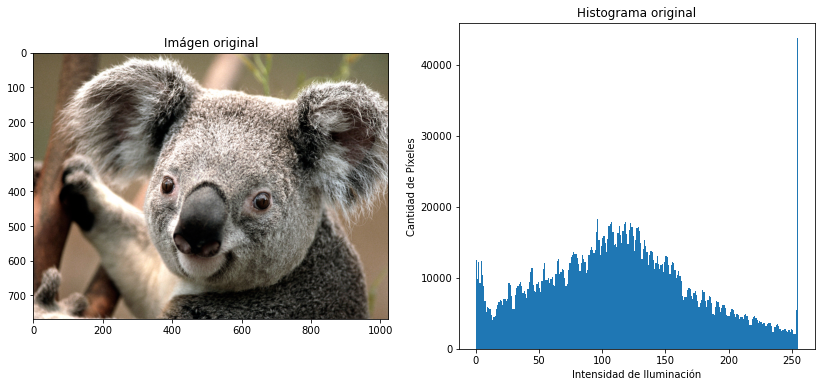

In [ ]:
#Visualicemos nuestra imágen junto a su histograma para ver si queremos corregirla
plt.figure(figsize=([14,6]))

plt.subplot(1,2,1), plt.imshow(imagen_RGB),
plt.title('Imágen original')


plt.subplot(1,2,2), plt.hist(imagen_RGB.ravel(),255,[0,255]),
plt.xlabel("Intensidad de Iluminación"),
plt.ylabel("Cantidad de Píxeles"),
plt.title("Histograma original")

plt.show()

Podemos ver que hay una gran concentración de píxeles en las intensidades de 100 a 150, y muy pocos píxeles toman el valor máximo de 255, y además el koala tiene colores oscuros.

Vamos a desarrollar un aplicativo que nos permita seleccionar los diferentes filtros para el cambio de luminancia, teniendo en cuenta que en nuestro caso nos interesa iluminarla.

In [ ]:
#Normalización
normalizada=np.zeros([imagen_RGB.shape[0],imagen_RGB.shape[1],imagen_RGB.shape[2]])
normalizada=cv2.normalize(src=imagen_RGB,dst=normalizada,alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

In [ ]:
import math

In [ ]:
def filtros(r,cuad,l):

    #Cambio de espacio de color
    yiq=np.zeros([normalizada.shape[0],normalizada.shape[1],normalizada.shape[2]])

    for i in range(normalizada.shape[0]):
        for j in range(normalizada.shape[1]):
            yiq[i,j,:]=np.dot(matriz_yiq,normalizada[i,j,:])
        
    #Modificaciones
    c=np.zeros([yiq.shape[0],yiq.shape[1],yiq.shape[2]])
    cc=np.zeros([yiq.shape[0],yiq.shape[1],yiq.shape[2]])
    
    #Variables para filtro a trozos
    m=yiq[:,:,0].max()
    mi=yiq[:,:,0].min()


    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            
            #Elección de filtros
            if r==1:
                c[i,j,:][0]=math.sqrt(yiq[i,j,:][0])
            
            elif cuad==1:
                c[i,j,:][0]=yiq[i,j,:][0]**2
            
            elif l==1:
                c[i,j,:][0]=yiq[i,j,:][0]/(m-mi)
            
                if c[i,j,:][0]>m:
                    c[i,j,:][0]=1
            
                elif c[i,j,:][0]<mi:
                    c[i,j,:][0]=0
                else:
                    c[i,j,:][0]=yiq[i,j,:][0]/(m-mi)
                
                
            c[i,j,:][1]=yiq[i,j,:][1]
            c[i,j,:][2]=yiq[i,j,:][2]

    #Cambio a rgb
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            c[i,j,:]=np.dot(matriz_rgb,c[i,j,:])
        
    #Paso a bits
    cc=cv2.normalize(src=c,dst=cc,alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    return cc

In [ ]:
#Elegimos el filtro con un 1, de manera que el que no querramos que funcione le pondremos 0 (cero)

r=int(input('Filtro raíz:'))
cuad=int(input('Filtro cuadrado:'))
l=int(input('Filtro lineal a trozos:'))
cf=filtros(r,cuad,l)

Filtro raíz:1
Filtro cuadrado:0
Filtro lineal a trozos:0


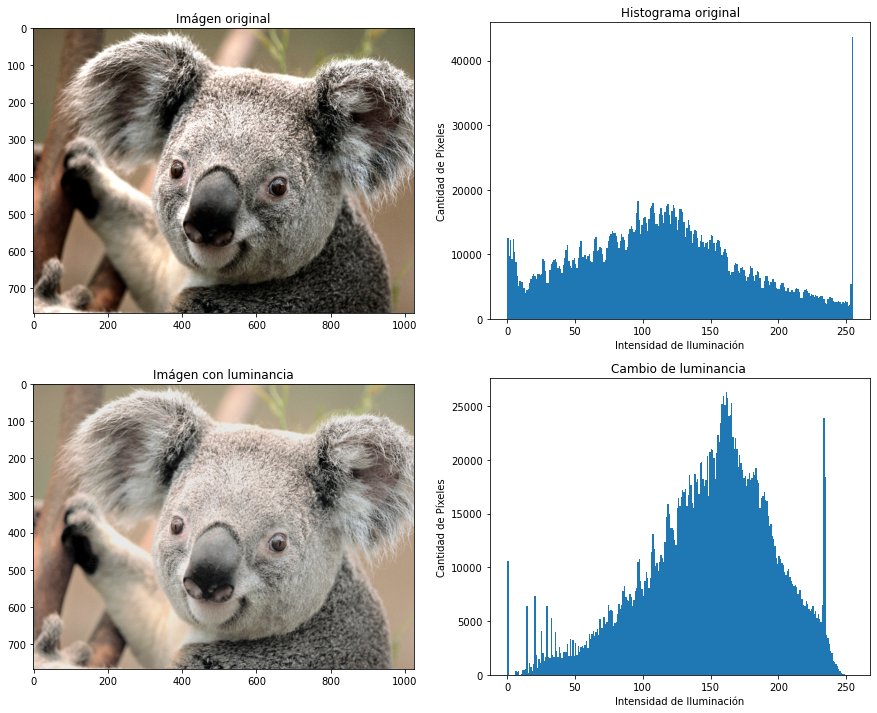

In [ ]:
#Graficamos los resultados

plt.figure(figsize=([15,12]))

plt.subplot(2,2,1), plt.imshow(imagen_RGB),
plt.title('Imágen original')


plt.subplot(2,2,2), plt.hist(imagen_RGB.ravel(),255,[0,255]),
plt.xlabel("Intensidad de Iluminación"),
plt.ylabel("Cantidad de Píxeles"),
plt.title("Histograma original")

plt.subplot(2,2,3), plt.imshow(cf.astype('uint8')),
plt.title('Imágen con luminancia')

plt.subplot(2,2,4), plt.hist(cf.astype('uint8').ravel(),255,[0,255])
plt.xlabel("Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles")
plt.title("Cambio de luminancia ")

plt.show()

Podemos ver que nuestro histograma se 'corrió' hacia la derecha, obteniendo más concentración de píxeles en las intensidades de 150 a 200

In [ ]:
imagen = cv2.imread('/content/drive/My Drive/Colab Notebooks/imagenes/f03bin1.bmp', cv2.IMREAD_GRAYSCALE)

# Sección nueva

<function matplotlib.pyplot.show>

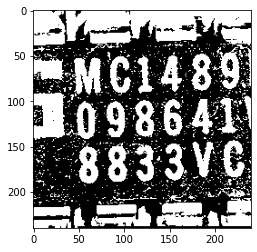

In [ ]:
plt.imshow(imagen, cmap='gray')
plt.show

In [ ]:
imagen.shape

(240, 240)

#### Filtros

In [ ]:
plano = np.outer(np.array([1/9, 1/9, 1/9]), np.array([1/9, 1/9, 1/9]))
plano

array([[0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568]])

In [ ]:
bartlett = np.outer(np.array([1, 2, 1]), np.array([1, 2, 1]))
bartlett

array([[1, 2, 1],
       [2, 4, 2],
       [1, 2, 1]])

In [ ]:
bartlett = bartlett/16

In [ ]:
gaussiano = np.outer(np.array([1,4,6,4,1]), np.array([1,4,6,4,1]))
gaussiano

array([[ 1,  4,  6,  4,  1],
       [ 4, 16, 24, 16,  4],
       [ 6, 24, 36, 24,  6],
       [ 4, 16, 24, 16,  4],
       [ 1,  4,  6,  4,  1]])

In [ ]:
gaussiano = gaussiano/256

In [ ]:
laplacev4 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
laplacev4

array([[ 0, -1,  0],
       [-1,  4, -1],
       [ 0, -1,  0]])

In [ ]:
sobel_este = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_este

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [ ]:
sobel_oeste = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_oeste

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [ ]:
sobel_norte = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_norte

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [ ]:
sobel_sur = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_sur

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [ ]:
import math
math.floor(gaussiano.shape[0]/2)

2

In [ ]:
def convolucion(imagen, kernel):
  top = math.floor(kernel.shape[0]/2)
  side = math.floor(kernel.shape[1]/2)
  imagen_nueva = np.zeros(imagen.shape)
  (ilim, jlim) = np.shape(kernel)
  (dim_x, dim_y) = np.shape(imagen)
  #agrego padding
  imagen = cv2.copyMakeBorder(imagen,top,top,side,side,cv2.BORDER_REPLICATE)
  
  for i in range(dim_x):
    for j in range(dim_y):
      imagen_entry = imagen[i:i+ilim, j:j+jlim]
      valor = np.sum(imagen_entry*kernel)
      imagen_nueva[i, j] = valor
  return imagen_nueva

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Antes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Después


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

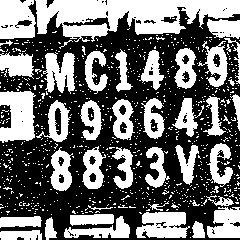

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

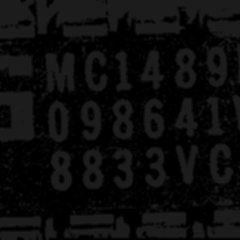

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(240, 240)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(240, 240)


<IPython.core.display.Javascript object>

In [ ]:
#@title Aplicar Filtro{ run: "auto" }
kernel = plano #@param ["plano", "bartlett", "gaussiano", "laplacev4", "sobel_este", "sobel_oeste", "sobel_norte", "sobel_sur"] {type:"raw", allow-input: true}
imagen_nueva = convolucion(imagen, kernel)
#creamos la grilla
grid = widgets.Grid(3, 2)

#ahora rellenamos las celdas
with grid.output_to(0, 0):
  print("Antes")
  
with grid.output_to(0, 1):
  print("Después")

with grid.output_to(1, 0):
  cv2_imshow(imagen)
  
with grid.output_to(1, 1):
  cv2_imshow(imagen_nueva)

with grid.output_to(2, 0):
  print(imagen.shape)
  
with grid.output_to(2, 1):
  print(imagen_nueva.shape)